# WDSA-CCWI 2022
# <font color='blue'> TSNet Short Tutorial

## Example 3: TNet2 - pump shutoff

In this example we will use Tnet2 to demonstrate how to simulate:

- Pump shutoff

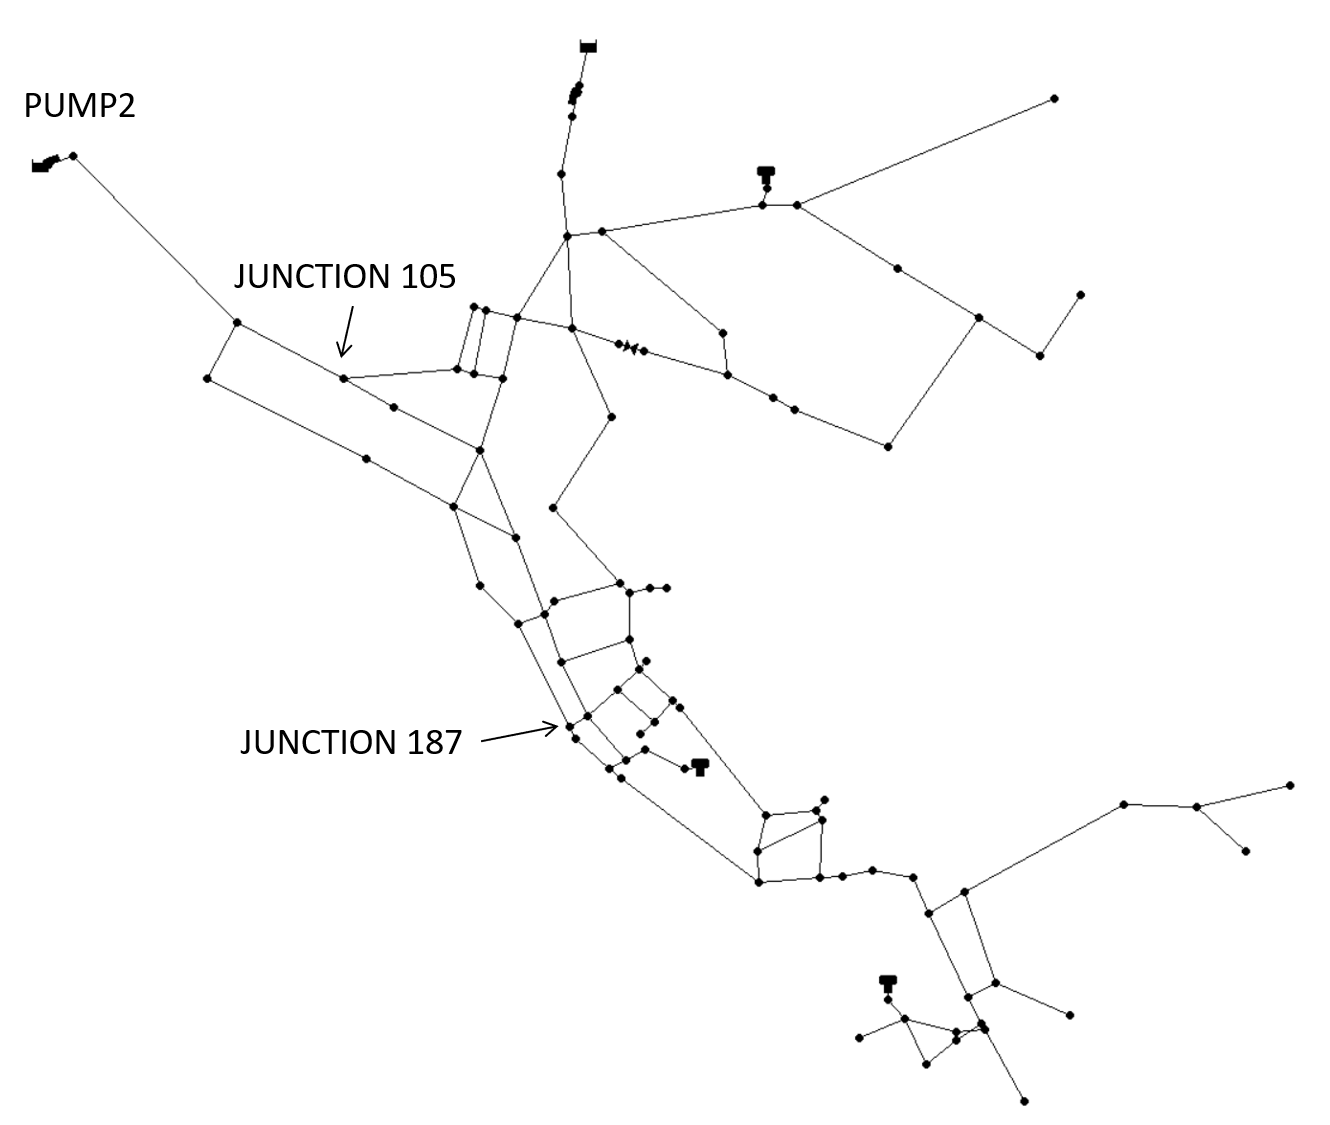

### Import packages

In [1]:
import tsnet
import matplotlib.pyplot as plt

### Create the model, define settings, and execute simuation
We will generate a trasient event by closing PUMP2

In [2]:
inp_file = 'Tnet2.inp'

# Open an example network and create a transient model
#-------------------------------------------------
tm = tsnet.network.TransientModel('networks/' + inp_file)


# Set wavespeed and time
#-------------------------------------------------
tm.set_wavespeed(1200.) # [m/s]
tf = 20 # simulation duration[s]
dt = 0.01 # time step [s]
tm.set_time(tf, dt)


# Set pump shut off
#-------------------------------------------------
tc = 1 # pump closure period
ts = 1 # pump closure start time
se = 0 # end open percentage
m = 1 # closure constant
pump_op = [tc, ts, se, m]
tm.pump_shut_off('PUMP2', pump_op)

# Initialize steady state simulation
#-------------------------------------------------
t0 = 0. # initialize the simulation at 0s
engine = 'DD' # or PPD
tm = tsnet.simulation.Initializer(tm, t0, engine)

# Transient simulation
#-------------------------------------------------
results_obj = 'Tnet2_pump' # name of the object for saving simulation results.head

tm = tsnet.simulation.MOCSimulator(tm,results_obj)


C:\Users\ps28866\AppData\Local\Continuum\anaconda3\envs\tsnet\lib\site-packages\wntr\epanet\io.py:2085: UserWarning: Not all curves were used in "networks/Tnet2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


Simulation time step 0.01043 s
Total Time Step in this simulation 1917
Estimated simulation time 0:01:04.556892
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...


### Get results

- Plot head at nodes JUNCTION-105, 109, and 187

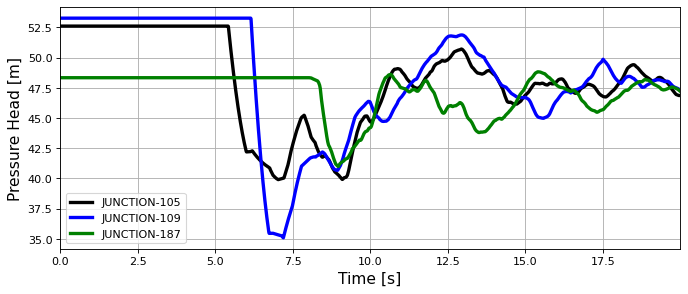

In [3]:
node = 'JUNCTION-105'
node = tm.get_node(node)
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='w')
plt.plot(tm.simulation_timestamps,node.head, 'k', lw=3,label = 'JUNCTION-105')
node = '109'
node = tm.get_node(node)
plt.plot(tm.simulation_timestamps,node.head, 'b', lw=3,label = 'JUNCTION-109')
node = '187'
node = tm.get_node(node)
plt.plot(tm.simulation_timestamps,node.head, 'g', lw=3,label = 'JUNCTION-187')
plt.xlim([tm.simulation_timestamps[0],tm.simulation_timestamps[-1]])
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Pressure Head [m]", fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()
fig.savefig('./networks/Tnet2_pump_shutoff_head.pdf', format='pdf',dpi=100)

- Plot the velocities at a selected pipe at the start and end 

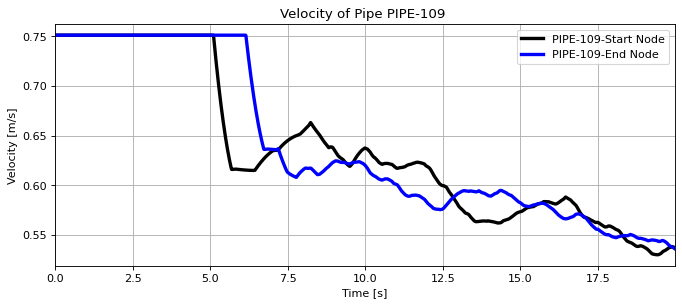

In [4]:
pipe = 'PIPE-109'
pipe = tm.get_link(pipe)
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='w')
plt.plot(tm.simulation_timestamps,pipe.start_node_velocity,'k', lw=3, label='PIPE-109-Start Node')
plt.plot(tm.simulation_timestamps,pipe.end_node_velocity,'b', lw=3, label='PIPE-109-End Node')
plt.xlim([tm.simulation_timestamps[0],tm.simulation_timestamps[-1]])
plt.title('Velocity of Pipe %s '%pipe)
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.legend(loc='best')
plt.grid(True)
plt.show()
fig.savefig('./networks/Tnet2_pump_shutoff_velocity.pdf', format='pdf',dpi=100)